In [1]:
# [1] Import all the necessary packages:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
# Note: Indicates situations that aren’t necessarily exceptions.
import warnings  
warnings.filterwarnings("ignore")



In [2]:
# [4] Read the provided CSV file/data set.
df = pd.read_csv("Customer_data.csv") 

In [3]:
# convert Edu column to single word 

df.loc[df['Edu'].str.contains('basic'), 'Edu'] = 'pre-school'
df.loc[df['Edu'].str.contains('professional'), 'Edu'] = 'masters'
df.loc[df['Edu'].str.contains('high'), 'Edu'] = 'high-school'
df.loc[df['Edu'].str.contains('illi'), 'Edu'] = 'other'
df.loc[df['Edu'].str.contains('unknown'), 'Edu'] = 'other'
df.loc[df['Edu'].str.contains('university'), 'Edu'] = 'uni'


In [36]:
features = ['Occupation', 'Status', 'Edu', 'House', 'Loan', 'Comm', 'Month',
       'DOW', 'Last_out']

new_df = pd.get_dummies(df, columns = features)

new_df.columns.values 

array(['Age', 'Duration', 'Campaign', 'PosDays', 'Var_rate', 'Price_idx',
       'Conf_idx', 'Month_rate', 'Quarterly_emp', 'Target',
       'Occupation_admin.', 'Occupation_blue-collar',
       'Occupation_entrepreneur', 'Occupation_housemaid',
       'Occupation_management', 'Occupation_retired',
       'Occupation_self-employed', 'Occupation_services',
       'Occupation_student', 'Occupation_technician',
       'Occupation_unemployed', 'Occupation_unknown', 'Status_divorced',
       'Status_married', 'Status_single', 'Status_unknown',
       'Edu_high-school', 'Edu_masters', 'Edu_other', 'Edu_pre-school',
       'Edu_uni', 'House_no', 'House_unknown', 'House_yes', 'Loan_no',
       'Loan_unknown', 'Loan_yes', 'Comm_cellular', 'Comm_telephone',
       'Month_apr', 'Month_aug', 'Month_dec', 'Month_jul', 'Month_jun',
       'Month_mar', 'Month_may', 'Month_nov', 'Month_oct', 'Month_sep',
       'DOW_fri', 'DOW_mon', 'DOW_thu', 'DOW_tue', 'DOW_wed',
       'Last_out_failure', 'Last_out

In [37]:
# [1] Import all the necessary packages:
# [1a] Assists with providing classes and functions 
# to estimate many different statistical methods.
import statsmodels.api as sm   
import imblearn
# [1b] Helps split data into sets to create BLR.
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split 

# [1c] Indicates situations that aren’t necessarily exceptions.
import warnings  
warnings.filterwarnings("ignore")

# [2] Create the DataFrame to use as df_fin and replace 
# missing values with zero.
new_df = new_df.fillna(0)

# [3a] Set the variables:
X = new_df.loc[:, new_df.columns !='Target']
y = new_df.loc[:, new_df.columns == 'Target']

# [4] Create a new DataFrame and 
# [4a] Apply SMOTE as the target variable is not balanced.
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# [5] Specify column values.
columns = X_train.columns

# [6] Specify the new data sets.
os_data_X, os_data_y = os.fit_resample(X_train, y_train)

# [7] Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data= os_data_X, columns = columns)
os_data_y = pd.DataFrame(data= os_data_y, columns = ['Target'])

# [8] Print the DataFrame.
print('length of resampled data is', len(os_data_X))
os_data_y

length of resampled data is 51134


Target
0           0
1           0
2           0
3           0
4           0
...       ...
51129       1
51130       1
51131       1
51132       1
51133       1

[51134 rows x 1 columns]

In [6]:
from sklearn.linear_model import LogisticRegression

blr = LogisticRegression()
blr.fit(X_train,y_train)

y_pred = blr.predict(X_test)

In [7]:
# [1] Import the scikit-learn metrics module for an accuracy calculation:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Print the confusion matrix.
print(confusion_matrix(y_test, y_pred))  

# [3a] Specify model accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# [3b] Specify model precision: what percentage of 
# positive tuples are labelled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# [3c] Specify model recall: how good is the model at 
# correctly predicting positive classes?
print("Recall:",metrics.recall_score(y_test, y_pred))

[[10726   255]
 [  838   538]]
Accuracy: 0.9115481103827789
Precision: 0.6784363177805801
Recall: 0.39098837209302323


In [10]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=blr, step=1)
rfe = rfe.fit(os_data_X, os_data_y)

In [41]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

Feature  Ranking
27                 Edu_other        1
24            Status_unknown        1
25           Edu_high-school        1
26               Edu_masters        1
54      Last_out_nonexistent        1
28            Edu_pre-school        1
29                   Edu_uni        1
22            Status_married        1
30                  House_no        1
32                 House_yes        1
33                   Loan_no        1
34              Loan_unknown        1
35                  Loan_yes        1
36             Comm_cellular        1
37            Comm_telephone        1
31             House_unknown        1
21           Status_divorced        1
23             Status_single        1
49                   DOW_mon        1
53          Last_out_failure        1
52                   DOW_wed        1
16       Occupation_services        1
51                   DOW_tue        1
50                   DOW_thu        1
48                   DOW_fri        1
10    Occupation_blue-collar        1
12      Occupation_housemaid        1
11   Occupation_entrepreneur        1
18     Occupation_technician        2
15  Occupation_self-employed        3
13     Occupation_management        4
9          Occupation_admin.        5
20        Occupation_unknown        6
19     Occupation_unemployed        7
17        Occupation_student        8
14        Occupation_retired        9
39                 Month_aug       10
45                 Month_nov       11
41                 Month_jul       12
44                 Month_may       13
38                 Month_apr       14
42                 Month_jun       15
40                 Month_dec       16
47                 Month_sep       17
46                 Month_oct       18
43                 Month_mar       19
7                 Month_rate       20
5                  Price_idx       21
55          Last_out_success       22
4                   Var_rate       23
2                   Campaign       24
0                        Age       25
8              Quarterly_emp       26
6                   Conf_idx       27
1                   Duration       28
3                    PosDays       29

In [43]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=blr, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 55
Best features : Index(['Age', 'Duration', 'Campaign', 'PosDays', 'Var_rate', 'Price_idx',
       'Conf_idx', 'Month_rate', 'Quarterly_emp', 'Occupation_admin.',
       'Occupation_blue-collar', 'Occupation_entrepreneur',
       'Occupation_housemaid', 'Occupation_management', 'Occupation_retired',
       'Occupation_self-employed', 'Occupation_services', 'Occupation_student',
       'Occupation_technician', 'Occupation_unemployed', 'Occupation_unknown',
       'Status_married', 'Status_single', 'Status_unknown', 'Edu_high-school',
       'Edu_masters', 'Edu_other', 'Edu_pre-school', 'Edu_uni', 'House_no',
       'House_unknown', 'House_yes', 'Loan_no', 'Loan_unknown', 'Loan_yes',
       'Comm_cellular', 'Comm_telephone', 'Month_apr', 'Month_aug',
       'Month_dec', 'Month_jul', 'Month_jun', 'Month_mar', 'Month_may',
       'Month_nov', 'Month_oct', 'Month_sep', 'DOW_fri', 'DOW_mon', 'DOW_thu',
       'DOW_tue', 'DOW_wed', 'Last_out_failure', 'Last_out_n

In [44]:
rfecv.grid_scores_

array([[0.89647997, 0.89455428, 0.89542144, 0.89507458, 0.8997572 ],
       [0.89647997, 0.89455428, 0.89542144, 0.89507458, 0.8997572 ],
       [0.89647997, 0.89628859, 0.89542144, 0.89559487, 0.89941034],
       [0.89717357, 0.89715574, 0.89559487, 0.89594173, 0.89889005],
       [0.89613317, 0.89715574, 0.89628859, 0.8957683 , 0.90010406],
       [0.89856078, 0.89732917, 0.89628859, 0.89611516, 0.90027749],
       [0.89821398, 0.89698231, 0.89646202, 0.89611516, 0.90045092],
       [0.89717357, 0.89698231, 0.89646202, 0.89611516, 0.90010406],
       [0.89682677, 0.89698231, 0.89611516, 0.89611516, 0.90010406],
       [0.89700017, 0.89680888, 0.89611516, 0.89594173, 0.90010406],
       [0.89700017, 0.8975026 , 0.8957683 , 0.89646202, 0.90097121],
       [0.89700017, 0.8975026 , 0.89611516, 0.89646202, 0.90079778],
       [0.89752037, 0.89767603, 0.89611516, 0.89646202, 0.90079778],
       [0.89769377, 0.89767603, 0.89611516, 0.89646202, 0.90027749],
       [0.89786718, 0.89767603, 0.

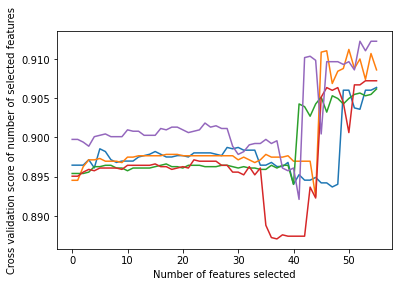

In [49]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(rfecv.grid_scores_)
plt.show()